<a href="https://colab.research.google.com/github/Surojit-KB/UNIV-AI-ML2-HW1/blob/main/Copy_of_distribute_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2: Trees, Model Interrogation and Bayesian Workflow
# Homework 1: Harnessing data to help the heart!

**ML-2 Cohort 1** <br>
**Instructor: Dr. Rahul Dave**<br>
**Max Score: 100** <br>

#### **Name of people who have worked on this homework:**

## Table of Contents 

* HW-1: Harnessing data to help the heart!
  * Instructions
  * Learning Goals
  * Loading the DataFrame
  * Q1: Exploratory Data Analysis (EDA and Data Pre-Preprocessing) **(10 marks)**
    * 1.1 Understanding the data
    * 1.2 Data Pre-processing
      * 1.2.1 Split the data
      * 1.2.2 Combine the X_train and y_train into one dataframe
    * 1.3 Exploratory Data Analysis 
      * 1.3.1 Show the target distribution? - Number of people with no Heart Disease and Number of people with Heart Disease
      * 1.3.2 How is age distributed? What is the most common age to get a heart disease? How is gender related to age?
      * 1.3.3 Which has the most postive and negative correlation with the target variable?
      * 1.3.4 Correlation between Blood Sugar level, Slope type and Thalessemia type with target
      * 1.3.5 Plot the histogram for the all variables in train set
    * 1.4 Defining Accuracy function
  * Q2: Models **(80 marks)**
    * 2.1 Baseline model - Logistic Regression 
    * 2.2 Decision Trees 
      * 2.2.1 Pruning 
        * 2.2.1.1 Pruning based on cost complexity parameter
        * 2.2.1.2 Pruning based on max depth 
      * 2.2.2 Comparing Decision Tree Models 
    * 2.3 Bagging Tree Model 
    * 2.4 Random Forest 
      * 2.4.1 Permutance Importance 
      * 2.4.2 Out of Bag Score 
    * 2.5 Boosting 
    * 2.6 XGBoost 
  * Q3: Comparing the Models**(10 marks)**
  * Bonus Question **(20 marks)**

## Instructions

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To work on the homework, you will first need to fork the repository into your GitHub account and clone it to work on it on your local computer. To submit your homework, push your homework into the same GitHub and upload the link on edStem.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

## Learning Goals

We will look here into the practicalities of fitting classification trees, random forests, and boosted trees. These involve out-of-bound estimates and cross-validation, and how you might want to deal with hyperparameters in these models. 

The homework is divided into four main parts:
1. Exploratory Data Analysis on the dataset and data-preprocessing
2. Developing Baseline model using Logistic Regression
3. Working with different tree models
4. Comparing the models to check which performed better

In [63]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from matplotlib import colors
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage
from tqdm.notebook import tqdm

## Load the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UNIV-AI-ML2/HW/heart_data.csv') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

## Part 1: Exploratory Data Analysis and Data-Preprocessing **(10 marks)**



### 1.1 Understanding the data

**The data consist 303 individual data with 13 features and output label. Features are as follows**

* **Age** : displays the age of the individual.
* **Sex** : displays the gender of the individual using the following format:
    * 1 = male 
    * 0 = female
* **Chest-pain type (cp)**: displays the type of chest-pain experienced by the individual using the following format : 
    * 1 = typical angina 
    * 2 = atypical angina 
    * 3 = non — anginal pain 
    * 4 = asymptotic
* **Resting Blood Pressure (trestbps)**: displays the resting blood pressure value of an individual in mmHg (unit)
* **Serum Cholesterol (chol)**: displays the serum cholesterol in mg/dl (unit)
* **Fasting Blood Sugar (fbs)**: compares the fasting blood sugar value of an individual with 120mg/dl. 
  * If fasting blood sugar > 120mg/dl then : 1 (true) 
  * If fasting blood sugar < 120mg/dl then : 0 (false)
* **Resting ECG (restecg)**: displays resting electrocardiographic results 
  * 0 = normal
  * 1 = having ST-T wave abnormality 
  * 2 = left ventricular hypertrophy
*  **Max heart rate achieved (thalach)**: displays the max heart rate achieved by an individual.
* **Exercise induced angina (exang)**: 
  * 1 = yes 
  * 0 = no
* **ST depression induced by exercise relative to rest (oldpeak)**: displays the value which is integer or float.
* **Peak exercise ST segment (slope)**: 
  * 1 = upsloping 
  * 2 = flat 
  * 3 = downsloping
* **Number of major vessels (0–3) colored by fluoroscopy (ca)**: displays the value as an integer or float.
* **Thal** : displays the thalassemia : 
  * 1 = normal 
  * 2 = fixed defect 
  * 3 = reversible defect
* **(Output)Diagnosis of heart disease (target)**: Displays whether the individual is suffering from heart disease or not : 
  * 0 = absence 
  * 1 = presence

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#check that dataset datatypes and check nulls 
#your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 1.2 Data Preprocessing

In [4]:
#set the random state as 42 throughout the homework
rf=42

#### 1.2.1 Splitting the data
1. First split the data into input and output variables 
2. Then split the data into train and test, with **0.3 as the test size** and random state is set as rf(as defined previously).

In [31]:
#splitting the target and input variables
#your code here
X=df.drop('target',axis=1)
y=df['target']

In [32]:
#train test split - split with 0.3 as test size and random state is rf
#your code here
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=rf)

#### 1.2.2 For us to do EDA on the train set, we will need to combine the X_train and y_train into one dataframe

In [33]:
#combining X_train and y_train into a single dataframe
#your code here
train_df=pd.concat([X_train,y_train],axis=1)

In [34]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### 1.3 Exploratory Data Analysis


**The most efficient way to interpret data and to find relations between the different variables is by Visualisation.**
 
**Hence answer the following questions using appropriate visualisation tool(plotting).** 

#### 1.3.1 Show the target distribution? - Number of people with no Heart Disease and Number of people with Heart Disease

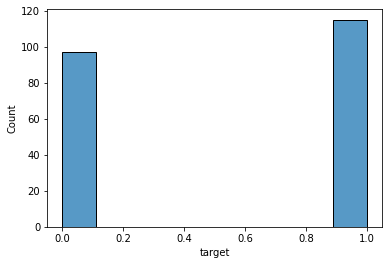

In [ ]:
#your code here
sns.histplot(train_df['target'])

#### 1.3.2 How is age distributed? What is the most common age to get a heart disease? How is gender related to age?

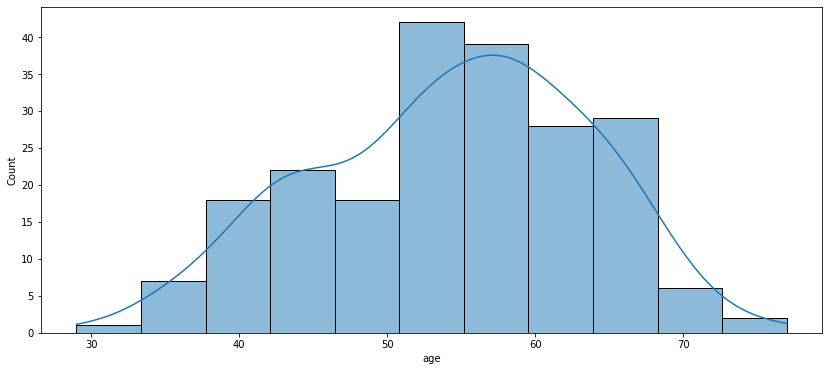

In [ ]:
#checking the distribution of age
#your code here
fig=plt.figure(figsize=(14,6))
sns.histplot(data=train_df,x='age',kde=True,multiple='stack')

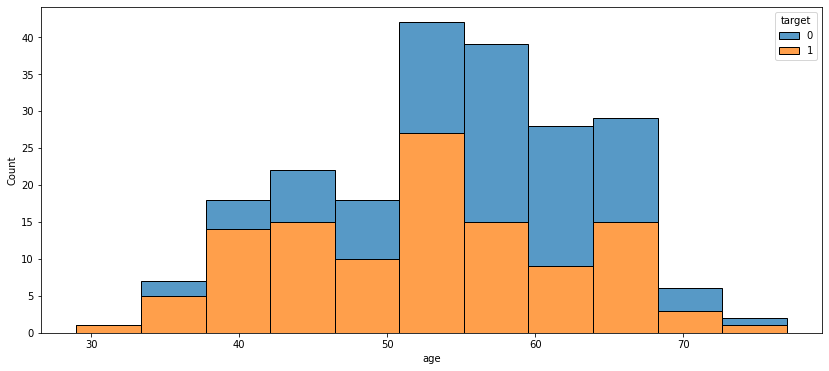

In [ ]:
#plot to check variation of age wrt to target 
#your code here
fig=plt.figure(figsize=(14,6))
sns.histplot(data=train_df,x='age',hue='target',multiple='stack')

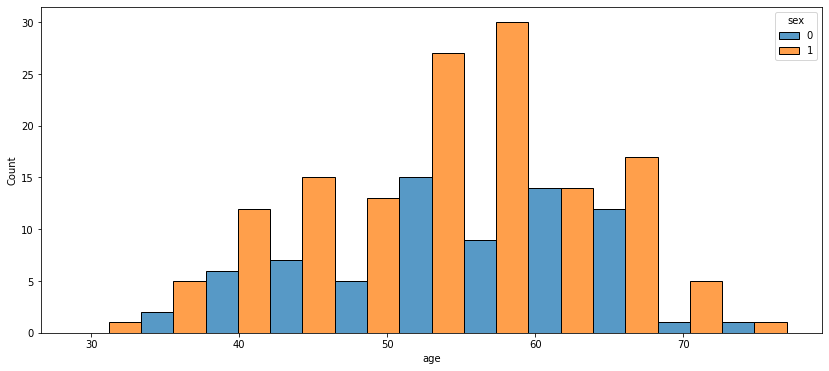

In [ ]:
#age vs gender
#your code here
fig=plt.figure(figsize=(14,6))
sns.histplot(data=train_df,x='age',hue='sex',multiple='dodge')

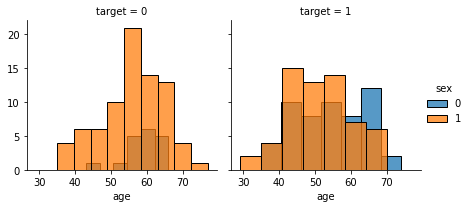

In [ ]:
g=sns.FacetGrid(train_df,col='target',hue='sex')
g.map(sns.histplot,'age',multiple='dodge')
g.add_legend()

your answer here

#### 1.3.3 Which has the most postive and negative correlation with the target variable?


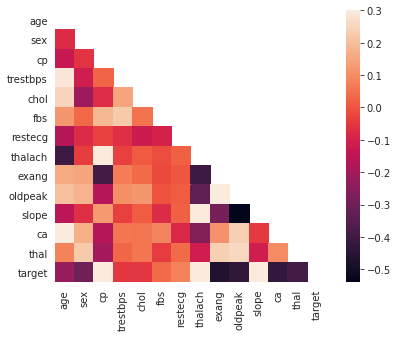

In [ ]:
#your code here
corr = train_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):   
  f, ax = plt.subplots(figsize=(7, 5))    
  ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


your answer here

#### 1.3.4 Correlation between Blood Sugar level, Slope type and Thalessemia type with target

In [ ]:
#your code here
fig,ax=plt.subplots(1,3,figsize=20,8)
sns.scatterplot(data='train_df',x='')

your answer here

#### 1.3.5 Plot the histogram for the all variables in train set

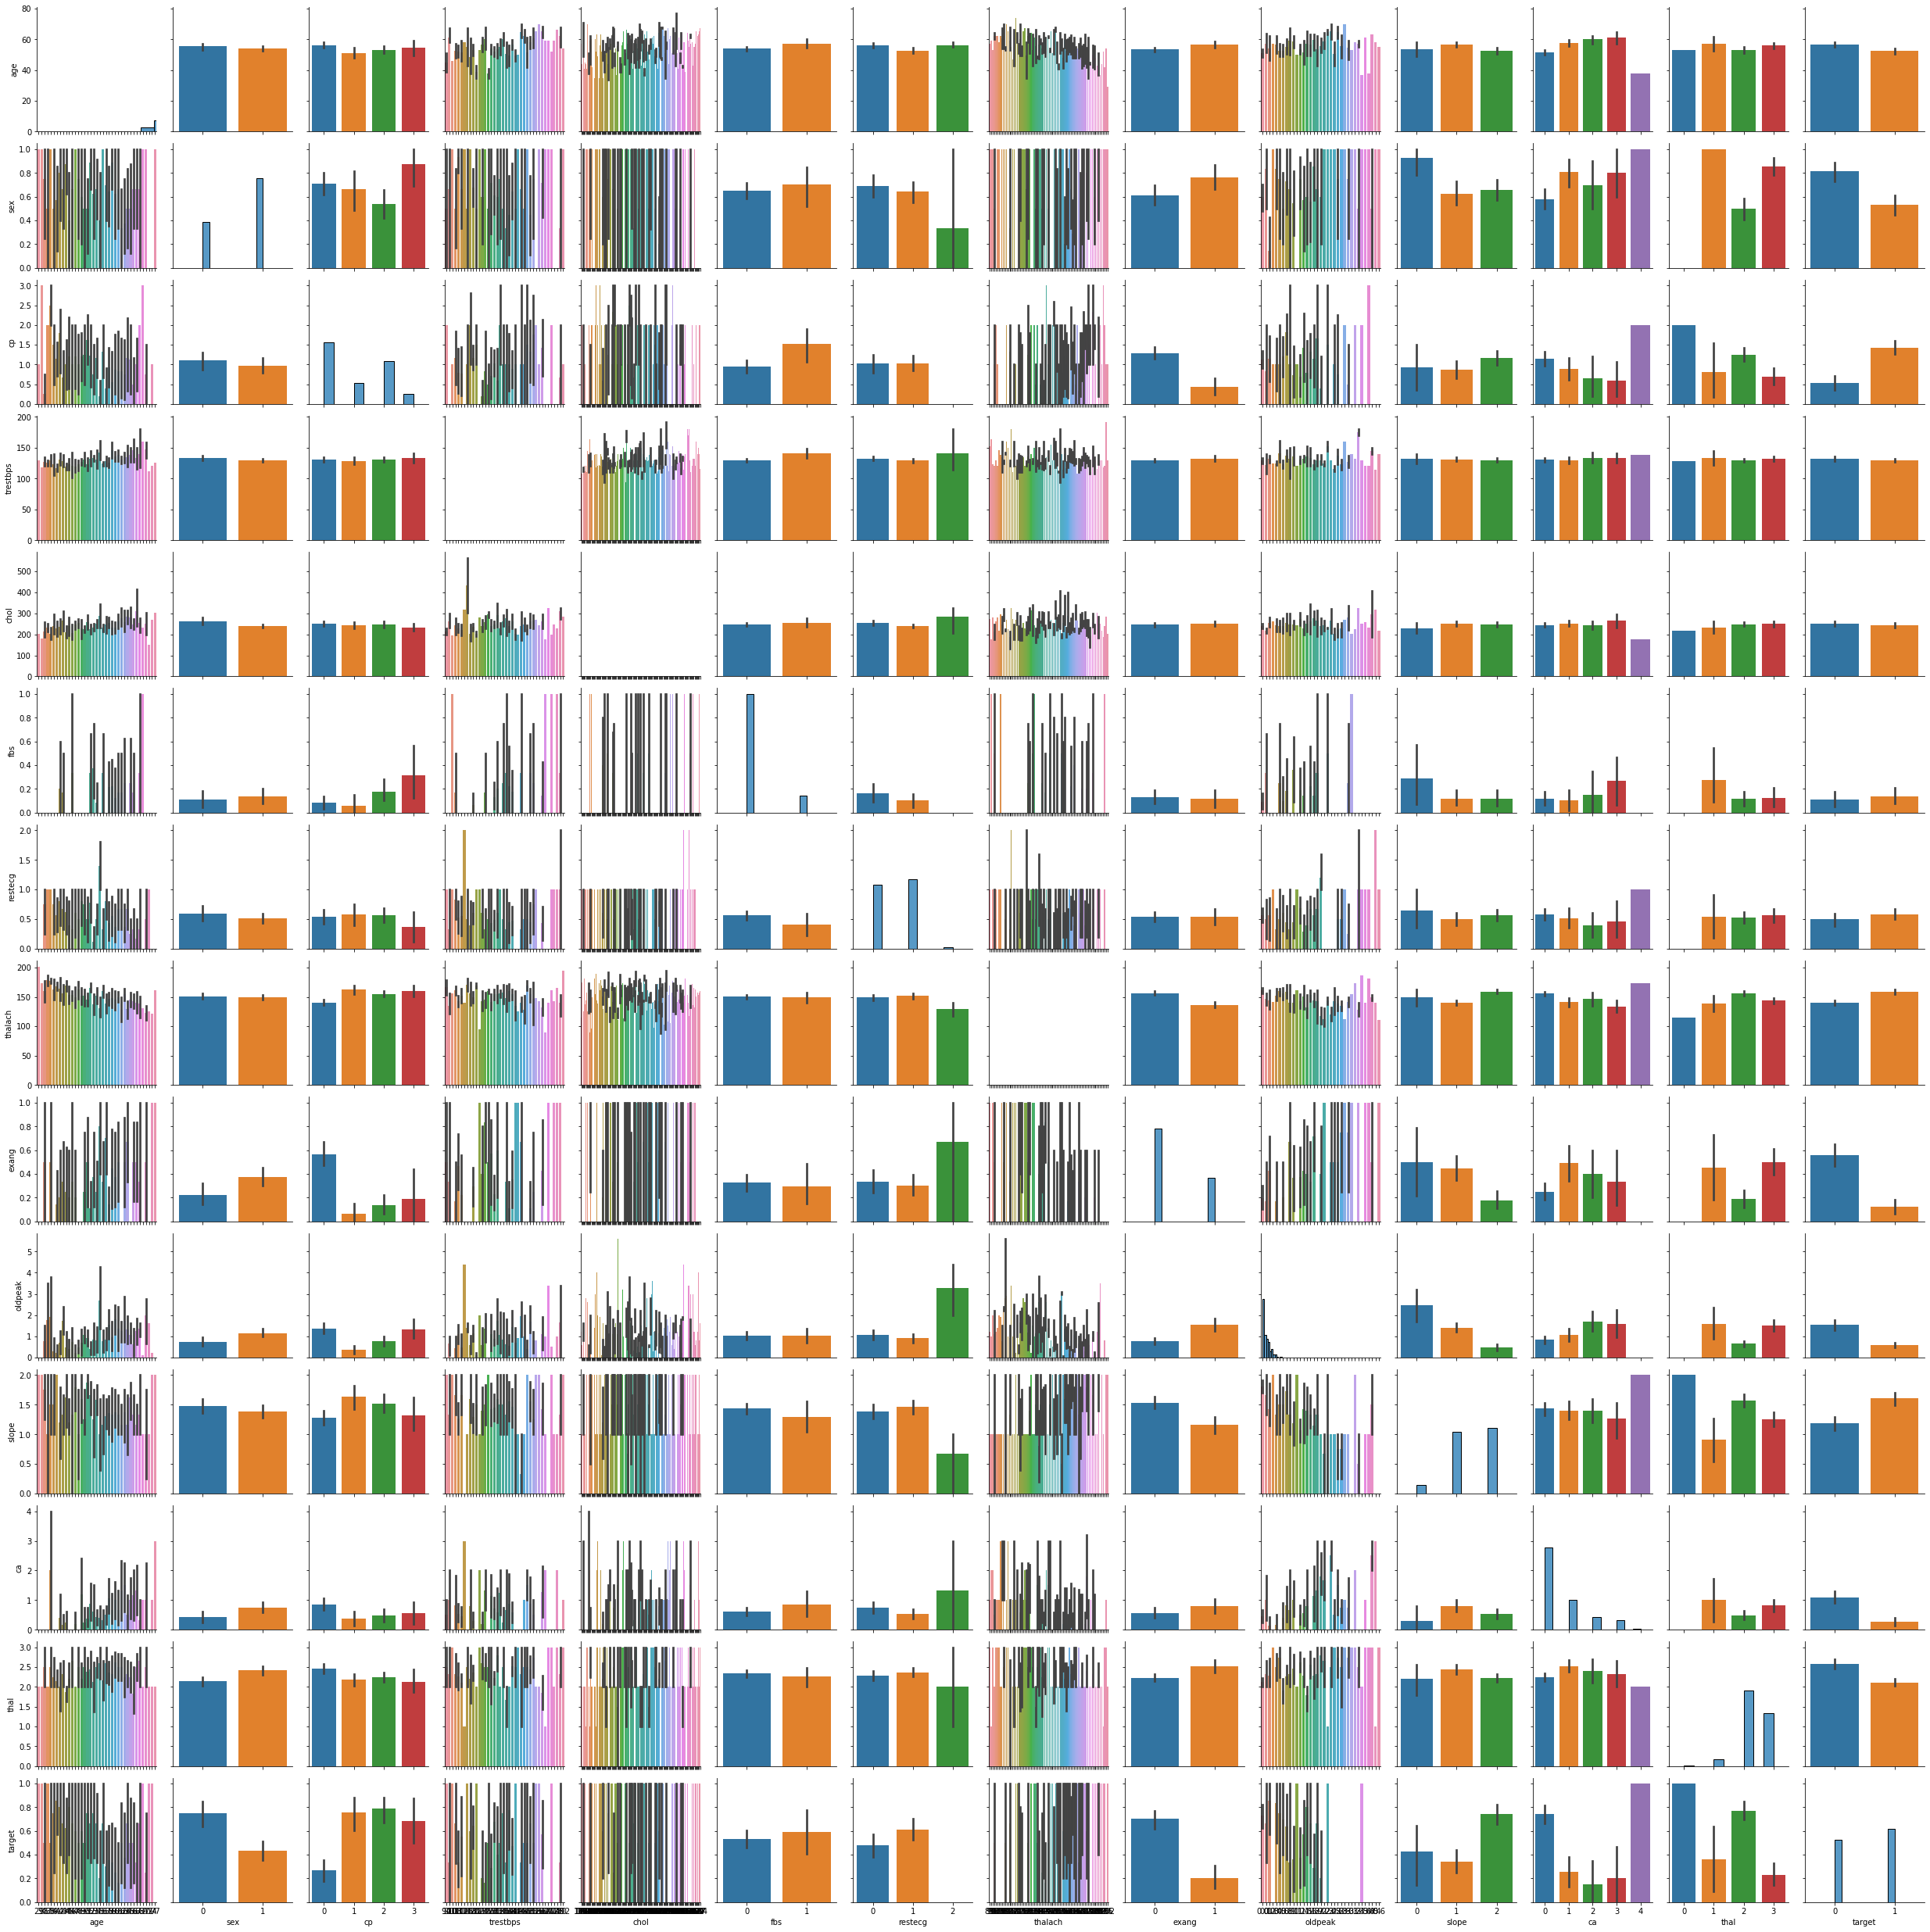

In [ ]:
#plot histogram for all variables
#your code here
g = sns.PairGrid(train_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.barplot)

##### Based on the histogram plotted above, it looks like we need to standardise the data, right? But tree models do not need standardising, explain why?

your answer here

### 1.4 Defining function to calculate accuracy

We will define a function to calculate the model accuracy using `accuracy_score`

In [35]:
#Function to get test accuracy
def accuracy(X, y, model):
    #X is the testing data to predict on, y is the actual data
    #your code here
    y_pred=model.predict(X)
    acc=accuracy_score(y,y_pred)
    return acc

In [200]:
def get_model_info(train_acc, model_params, test_acc, train_con_mat, test_con_mat):
  train_tp=train_con_mat[1,1]
  train_fp=train_con_mat[0,1]
  train_tn=train_con_mat[0,0]
  train_fn=train_con_mat[1,0]
  test_tp=test_con_mat[1,1]
  test_fp=test_con_mat[0,1]
  test_tn=test_con_mat[0,0]
  test_fn=test_con_mat[1,0]
  train_prec=train_tp/(train_tp+train_fp)
  test_prec=test_tp/(test_tp+test_fp)
  train_rec=train_tp/(train_tp+train_fn)
  test_rec=test_tp/(test_tp+test_fn)
  train_f1=2*train_prec*train_rec/(train_prec+train_rec)
  test_f1=2*test_prec*test_rec/(test_prec+test_rec)
  model_dict={'Model Params': model_params,
              'Train Accuracy':train_acc,
              'Test Accuracy':test_acc,
              'Train [TP,FP,TN,FN]':[train_tp,train_fp,train_tn,train_fn],
              'Test [TP,FP,TN,FN]':[test_tp,test_fp,test_tn,test_fn],
              'Train Precision':train_prec,
              'Train Recall':train_rec,
              'Train F1':train_f1,
              'Test Precision':test_prec,
              'Test Recall':test_rec,
              'Test F1':test_f1}
  return model_dict

In [201]:
def cv_optimize(clf, parameters, X, y, n_folds,verbose):

    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds,scoring='accuracy',n_jobs=-1,verbose=verbose)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    best_model = gs.best_estimator_
    best_params= gs.best_params_
    return best_model,best_params

In [202]:
def plot_con_mat(model): 
  train_con_mat=confusion_matrix(y_train,model.predict(X_train))
  test_con_mat=confusion_matrix(y_test,model.predict(X_test))
  fig,ax=plt.subplots(1,2,figsize=(16,8))
  sns.heatmap(train_con_mat,annot=True,fmt="d",ax=ax[0])
  sns.heatmap(test_con_mat,annot=True,fmt='d',ax=ax[1])
  ax[0].set_xlabel('Predicted',fontsize=15)
  ax[0].set_ylabel('Observed',fontsize=15)
  ax[1].set_xlabel('Predicted',fontsize=15)
  ax[1].set_ylabel('Observed',fontsize=15)
  ax[0].set_title('Confusion Matrix for Train data',fontsize=15)
  ax[1].set_title('Confusion Matrix for Test data',fontsize=15)
  return train_con_mat,test_con_mat;

In [203]:
model_params={}

## Part 2: Models! **(80 marks)**


**Now that we have completed understanding the data and pre-processing the data, lets move on to the next step of building models on the data**

We will use two metrics to evaluate our model.
1. The accuracy function we defined - this will help us understand the training and testing accuracy of the model
2. Confusion matrix to evaluate the model

Remember the basics of Confusion Matrix: 

![Cm.jpeg](https://drive.google.com/uc?export=view&id=14q4KVVqWiP6C0dve4745UX7LN3vKl0i6)


This is how sklearn plots it confusion matrix, hence remember this in each step where you are required to do analysis.


### 2.1 Baseline Model - Logistic Regression **(5 marks)**

We will start with the most basic classification algorithm - **Logistic Regression**. 

1. We will create a pipeline - where we will pass the `('standardizer', StandardScaler()` and sklearn's logistic regression with random_state as rf(42). Lets call this model **LR_model**
2. Create the parameter_grid to be passed to the model - this can be anything, you are cross validating to get the best score for your model, hence chose the parameters you want to define. 
3. Pass the pipeline and the parameter_grid to the GridSearchCV, with `cv =10 ` and `scoring = "accuracy"`
4. Fit the model
5. Print the performance of the model(training and testing accuracy) using the accuracy function defined by you. 
7. Print out the best params of the model
6. Plot the confusion matrix to evaluate the model. 
4. Based on the confusion matrix and the accuracy - **draw conclusions about the model**

In [40]:
#build a pipeline
#your code here
clf = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(solver='saga',random_state=rf))])

In [41]:
#hyper-parameters tuning 
#your code here
param_grid={'classifier__penalty':['l1','l2'],'classifier__C':[0.001,0.01,0.1,1,10,100,1000]}

In [47]:
#fit the model
#your code here
best_log_reg,base_param=cv_optimize(clf=clf,parameters=param_grid,X=X_train,y=y_train,n_folds=10,verbose=False)

BEST {'classifier__C': 1, 'classifier__penalty': 'l1'} 0.8391774891774892


In [48]:
#check the performance- accuracy
#your code here
base_train_acc=accuracy(X_train,y_train,best_log_reg)
base_test_acc=accuracy(X_test,y_test,best_log_reg)
print(f'Train accuaracy for the logistic regression model with best parameters is {base_train_acc:.2f}')
print(f'Test accuaracy for the logistic regression model with best parameters is {base_test_acc:.2f}')

Train accuaracy for the logistic regression model with best parameters is 0.86
Test accuaracy for the logistic regression model with best parameters is 0.81


In [49]:
#get the best parameters
#your code here
base_model_params=best_log_reg.get_params
print('The best parameters for the base model using Logistic Regression are:')
print(base_model_params)

The best parameters for the base model using Logistic Regression are:
<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)>


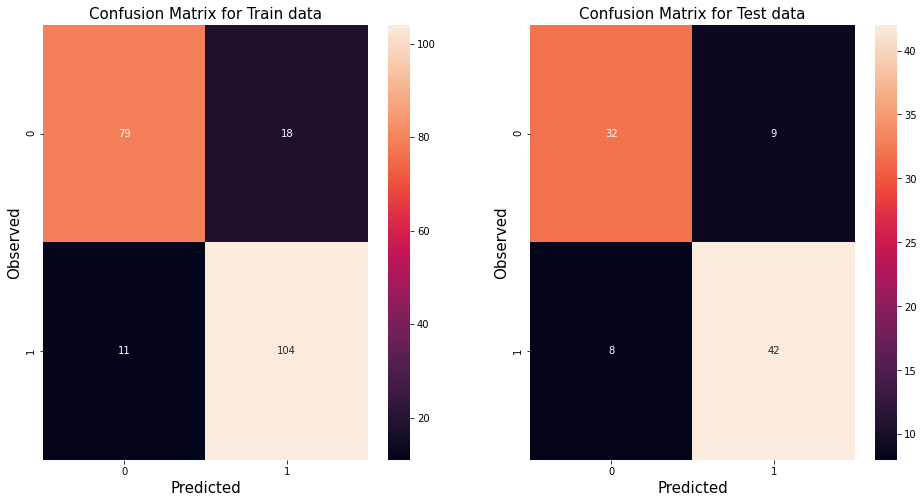

In [53]:
#plot the confusion matrix
#your code here
base_train_con_mat,base_test_con_mat=plot_con_mat(best_log_reg);

In [204]:
model_params['Logistic_Regression']=get_model_info(base_train_acc,base_param,base_test_acc,base_train_con_mat,base_test_con_mat)

#### What can you say about the model? By looking the the accuracy and the confusion matrix. 

your answer here


### 2.2 Decision Tree **(30 marks)**

We will use a simple Decision Tree Classifer to classify the target variable. 
This is what you ought to keep in mind about decision trees.

**from the docs of sklearn:**

* `max_depth` : int or None, optional (default=None)
  * The maximum depth of the tree. If **None**, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
* `min_samples_split` : int, float, optional (default=2)

**Remember:**

The deeper the tree, the more prone you are to overfitting.
The smaller `min_samples_split`, the more the overfitting. One may use `min_samples_leaf` instead. More samples per leaf, the higher the bias.

**Steps to follow:**


1. Use sklearn's DecisionTreeClassifer to fit the model on the training set - **do not** use `max_depth` here - let it be **default(None)** - we want to see how much the depth goes upto, and set the `random_state = rf`. Call this model **DecisionTree**
2. Print the performance of the model(training and testing accuracy) using the accuracy function defined by you. 
3. Plot the confusion matrix to evaluate the model.
4. Plot the Decision Tree built using sklearn's tree 
5. Based on the confusion matrix and the accuracy - draw conclusions about the model

In [55]:
#fit the model
#your code here
DecisionTree=DecisionTreeClassifier(random_state=rf)
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [56]:
#Performance
#your code here
dec_train_acc=accuracy(X_train,y_train,DecisionTree)
dec_test_acc=accuracy(X_test,y_test,DecisionTree)
print(f'Train accuracy for fully grown Decision Tree is',dec_train_acc)
print(f'Test accuracy for fully grown Decision Tree is',dec_test_acc)

Train accuracy for fully grown Decision Tree is 1.0
Test accuracy for fully grown Decision Tree is 0.7362637362637363


In [57]:
print('The max depth of the fully grown Decision Tree is',DecisionTree.get_depth())

The max depth of the fully grown Decision Tree is 9


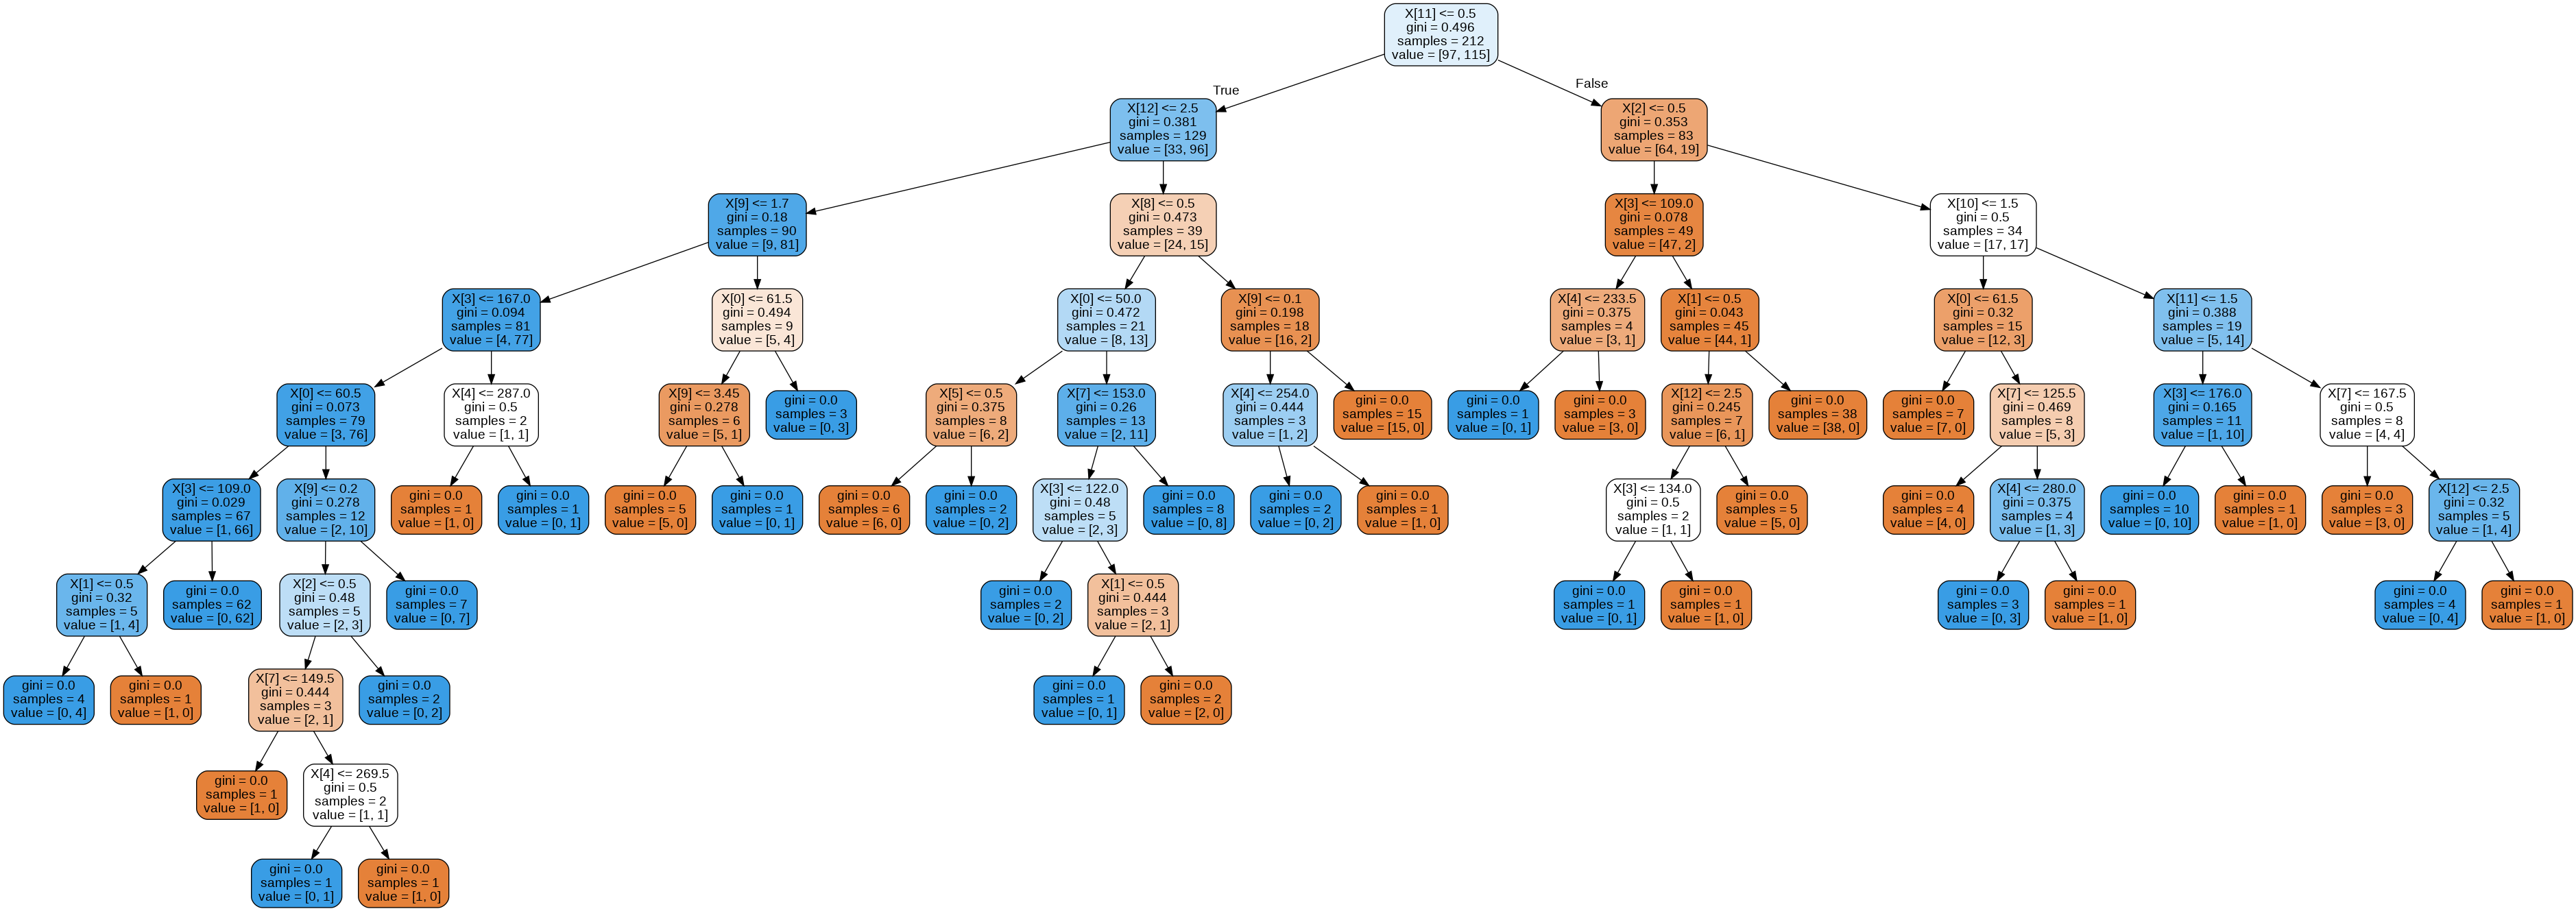

In [58]:
#plot the tree
#your code here
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(DecisionTree,out_file=f,rounded = True,filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

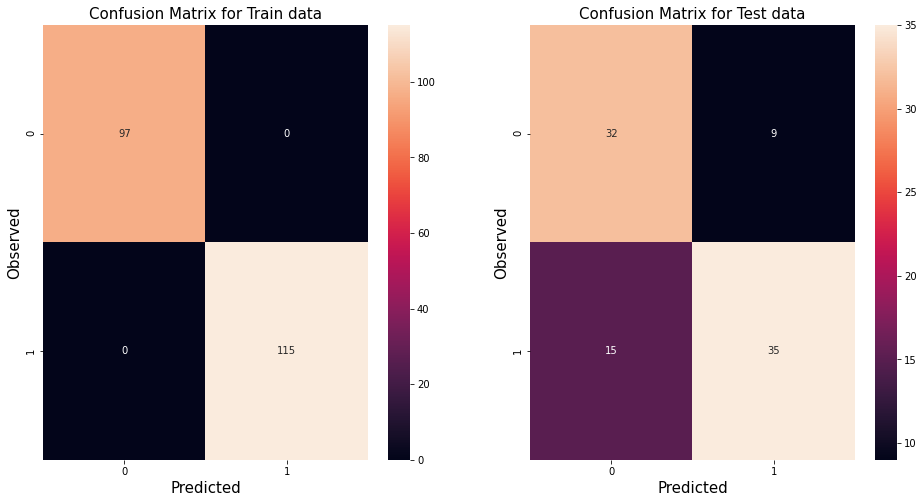

In [59]:
#plot the confusion matrix
#your code here
dectree_train_con_mat,dectree_test_con_mat=plot_con_mat(DecisionTree);

In [215]:
model_params['Decision Tree']=get_model_info(dec_train_acc,{'depth':DecisionTree.get_depth()},dec_test_acc,dectree_train_con_mat,dectree_test_con_mat)

#### What conclusions can you draw from the confusion matrix above? How different is this from the Logistic Regression Model defined by you 
 
your answer here


### 2.2.1 Pruning **(25 marks)**

Now you see based on the accuracy and the confusion matrix, your model is overfitting. Overfitting in Decision Trees is extremely common. To solve this issue, we will opt for two different approaches:

1. **Pruning** by choosing the best cost complexity parameter(`ccp_alpha`), `ccp_alpha` controls how less or more the pruning happens. 
  * Greater values of `ccp_alpha` increase the number of nodes pruned. - A way to find the best `ccp_alpha` value is by plotting the testing and training accuracy for all `ccp_alpha` values, and then cross validating

2. By finding the best **max_depth**. 

#### 2.2.1.1 Pruning using Cost complexity parameter - ccp_alpha

##### Cost Complexity Pruning: Visualize alpha

For finding the `best alpha` follow the steps below:

1. From the previous Decision Tree built, get all the values of `ccp_alphas` and build a pruned tree for **each value** of `ccp_alphas`. 

2. Plot the alpha values with respect to the training and testing accuracy. You plot should look something like this(**remember your plot will vary based on your model hence it will not look exactly like this**)
![accuracy.jpeg](https://drive.google.com/uc?export=view&id=1aUAAOS5rvsXQpadMNhDlbinpA7OJCais)
  * Create a datadrame with the training accuracy, testing accuracy and the respective alpha values. (call this dataframe as **scores**)
  * An example of this is below:
  
![ttsplit.jpeg](https://drive.google.com/uc?export=view&id=1yZnIefjMrDrSptYhysiwkRwvoRKNNUp8)
  * From the graph find out the value of best alpha.
  * Use this alpha to create a new model - call this model **DT_test**. 
  * Check the accuracy, and the plot the confusion matrix and the tree
  * Is the model performing better than the base Decision tree model you built?

3. Now, we got the best alpha for the training set we gave initially, however there is a possibility that if we have different training sets, the accuracy of the model and the best alpha value will also vary. 
  * To check this, perform **5-fold cross validation** with training set. This will help us see if the **accuracy varies for different values of training set**. If yes, then we can move forward with find different alpha values to get the most optimal alpha

4. Once you have confirmed that you get different accuracies, we will find a better alpha value than we did in the DT_test case. 
  * For this we will first check the range of alphas we got and the difference between two alpha values. We will cross validate our model using GridSearchCv - where the param_grid passed to it, will have the alpha values for the range we found and with the step_size as the difference. 
  * For example:
  Consider the dataframe image(scores), the range of alpha is from 0 to 0.0044 with a difference between two alphas as 0.001. This is what will be passed to the param_grid. This allows us to find a better value of alpha than the previous DT_test model. Name this alpha as `ideal_alpha_value`
4. Use this `ideal_alpha_value` in the new DecisionTreeClassifer Model - call it **DT_pruned**. 
  * Calculate the perfomance of the model
  * Plot the confusion matrix 
  * Plot the tree
  * Is this tree performing better than DT_test and Decision tree baseline model?

##### **Step 1:** Get all the values of Alpha and build a pruned tree for each value. 
First step, is to extract all the alpha and impurity values for the previous tree(Decision_tree) that we built and build a **pruned tree** for each value of alpha. 

**NOTE:**

**Omit the maximum value of alpha - this is beacause the maximum value would prune all leaves, hence leaving us with only root instead of the tree.**

Hence: 

`ccp_alphas = ccp_alphas[:-1]`

In [62]:
#Cost Complexity Pruning
#your code here
#Pruning
path=DecisionTree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('The number of alpha values obtained from cost complexity pruning are:',len(ccp_alphas))

The number of alpha values obtained from cost complexity pruning are: 24


In [64]:
#create a dictionary to store all the alpha values, and fit a model on each value of ccp_alphas we got from the previous step
DT_alphas = []
#your code here
for alpha in tqdm(ccp_alphas[:-1]):
  dtree=DecisionTreeClassifier(ccp_alpha=alpha,random_state=rf)
  dtree.fit(X_train,y_train)
  train_accuracy=accuracy(X_train,y_train,dtree)
  test_accuracy=accuracy(X_test,y_test,dtree)
  DT_alphas.append({'Train accuracy':train_accuracy,
                    'Test accuracy':test_accuracy,
                    'alpha':alpha})

##### **Step 2**: Plot the training and testing accuracies, and store the values in a data frame called `scores`

In [65]:
#your code here
scores=pd.DataFrame.from_records(DT_alphas)
scores

,Train accuracy,Test accuracy,alpha
0,1.000000,0.736264,0.000000
1,0.995283,0.725275,0.003075
2,0.990566,0.725275,0.003145
3,0.981132,0.736264,0.004188
4,0.976415,0.736264,0.004323
5,0.971698,0.725275,0.004437
6,0.962264,0.736264,0.005322
7,0.957547,0.736264,0.006289
8,0.952830,0.736264,0.007075
9,0.948113,0.736264,0.007547


In [66]:
best_prune_alpha=scores.iloc[np.argmax(scores['Test accuracy'])]['alpha']
best_prune_test_score=np.max(scores['Test accuracy'])

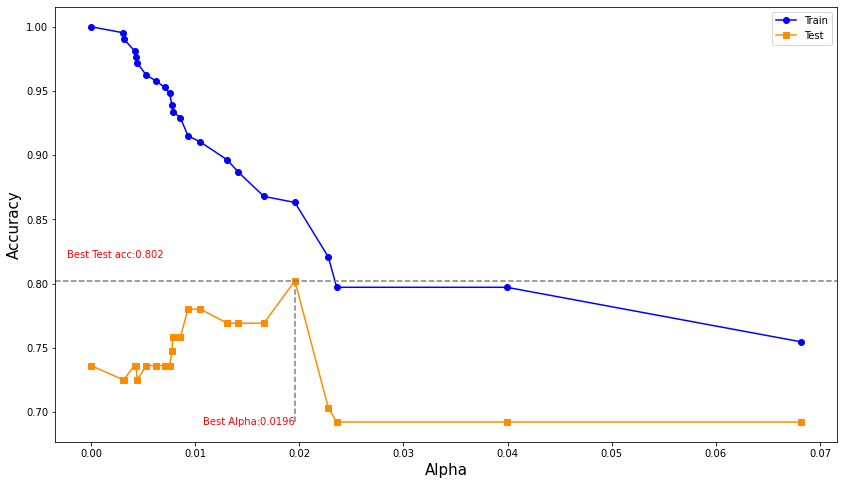

In [67]:
plt.figure(figsize=(14,8))
plt.plot(scores.alpha,scores['Train accuracy'],'o-',color='b',label='Train')
plt.plot(scores.alpha,scores['Test accuracy'],'s-',color='darkorange',label='Test')
plt.xlabel('Alpha',fontsize=15)
#plt.xticks(rotation='vertical')
plt.ylabel('Accuracy',fontsize=15)
plt.axhline(best_prune_test_score, linestyle='--', color='.5')
plt.vlines(best_prune_alpha,ymin=np.min(scores['Test accuracy']),ymax=best_prune_test_score,linestyle='--', color='.5')
plt.text(0.007,best_prune_test_score+0.02,"Best Test acc:{:.3f}".format(best_prune_test_score),color='red',ha='right',va='center')
plt.text(best_prune_alpha,np.min(scores['Test accuracy']),"Best Alpha:{:.4f}".format(best_prune_alpha),color='red',ha='right',va='center')
plt.legend();

###### **Which is the best value of alpha? and why?**

your answer here

###### Lets fit a model on the best_alpha value we obtained from the previous step, this will show us how much is the model pruned.

Call this model **DT_test**

In [68]:
#fit the model with the best ccp_alpha value you got
#your code here
DT_test=DecisionTreeClassifier(ccp_alpha=best_prune_alpha,random_state=rf)
DT_test.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.019578383414861414, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

In [69]:
print(f'The depth of the pruned Decision tree with ccp_alpha {best_prune_alpha:.5f} is {DT_test.get_depth()}')

The depth of the pruned Decision tree with ccp_alpha 0.01958 is 3


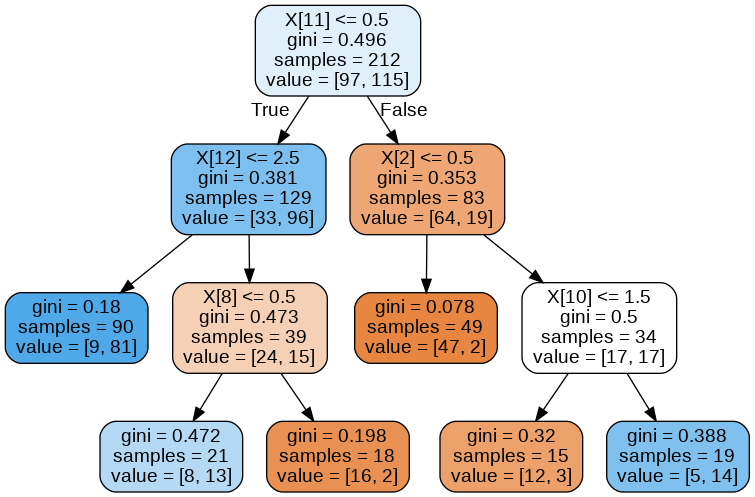

In [70]:
#plot the tree to see the pruning
#your code here
with open("tree2.dot", 'w') as f:
     f = tree.export_graphviz(DT_test,out_file=f,rounded = True,filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

# Annotating chart with PIL
img = Image.open("tree2.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [71]:
#check the training and testing score as well
#your code here
dt_train_acc=accuracy(X_train,y_train,DT_test)
dt_test_acc=accuracy(X_test,y_test,DT_test)
print(f'Train accuracy using best pruned tree with ccp_alpha {best_prune_alpha:.5f} is {dt_train_acc:.2f}')
print(f'Test accuracy using best pruned tree with ccp_alpha {best_prune_alpha:.5f} is {dt_test_acc:.2f}')

Train accuracy using best pruned tree with ccp_alpha 0.01958 is 0.86
Test accuracy using best pruned tree with ccp_alpha 0.01958 is 0.80


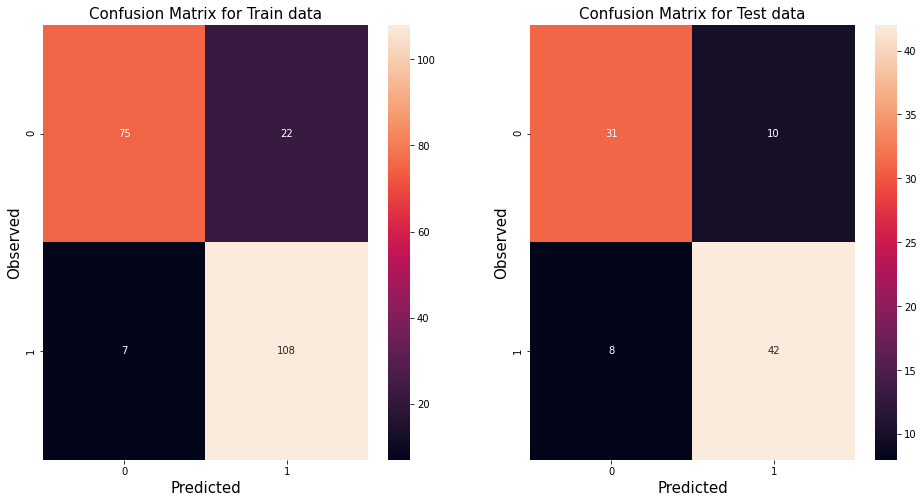

In [72]:
#plot the confusion matrix
#your code here
ccp_train_con_mat,ccp_test_con_mat=plot_con_mat(DT_test);

In [206]:
model_params['Pruning using ccp']=get_model_info(dt_train_acc,{'ccp_alpha':best_prune_alpha},dt_test_acc,ccp_train_con_mat,ccp_test_con_mat)

###### **What do you notice here?**
You see that the model performs slightly better,and is able to predict the true positives and false positives a little better than the base Decision tree model. 

We need to still get a much more accurate value of ccp_alpha to see a better pruned model. 

##### Step 3: Cross Validate to find the **Best Alpha**

Now that you know your best alpha. Can it be possible for a different training set your value of best alpha and accuracy can change? Lets check this!

To do this we will use Cross validation, we will do 5-fold cross validation here. 

What we want to see here is, how accurate the tree is with different sets of training data, **while the alpha value remains the same**(i.e. Set the value of ccp_alpha same as the best value of alpha you got from the previous step)

Plot tree vs accuracy. It should look something like this:

![tree_accuracy.jpeg](https://drive.google.com/uc?export=view&id=15-u3_4Bp3piEFVmn8y6-wxCdKpuEHuTt)

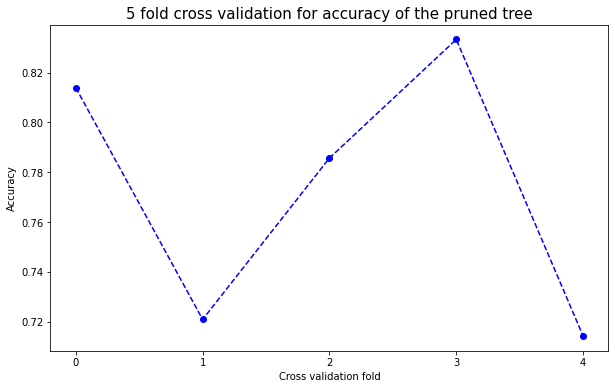

In [75]:
#use 5-fold cross validation to change the training set, plot the change in accuracy for each cross validated tree
#your code here
DT_test_cv=DecisionTreeClassifier(ccp_alpha=best_prune_alpha,random_state=rf)
val_scores=cross_val_score(DT_test_cv,X_train,y_train,cv=5)
fig=plt.figure(figsize=(10,6))
plt.plot(list(range(len(val_scores))),val_scores,'o--',color='b',)
plt.xlabel('Cross validation fold')
plt.ylabel('Accuracy')
plt.xticks(list(range(len(val_scores))))
plt.title('5 fold cross validation for accuracy of the pruned tree',fontsize=15);

Hence this proves that we get different accuracies when we do cross validation, hence this also means we wil have different values of best alphas

Now lets cross validate to find the best alpha
* So from the dataframe we built to find the best alpha, find the **range of alpha** and the **step_size**. 
* Perform GridSearchCV for the range of alphas with step size. And from this we will find the best alpha value. 



In [76]:
#range of alphas
#your code here
alpha_values=np.arange(0.003,0.06,0.001)
print(alpha_values)

[0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012 0.013 0.014
 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024 0.025 0.026
 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036 0.037 0.038
 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048 0.049 0.05
 0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059]


In [78]:
#hyper-parameter tuning and model fit
#your code here
param_grid={'ccp_alpha':alpha_values}
prune_estimator,pruned_param=cv_optimize(clf=DecisionTreeClassifier(random_state=rf),parameters=param_grid,X=X_train,y=y_train,n_folds=10,verbose=False)

BEST {'ccp_alpha': 0.013999999999999999} 0.7824675324675325


In [80]:
#find the best parameter
#your code here
best_cv_alpha=pruned_param['ccp_alpha']

What value of alpha is provided by the gridsearchcv?

your answer here

Now lets get the `ideal_ccp_alpha` from the gridsearch

In [81]:
ideal_ccp_alpha = best_cv_alpha

##### Step 4: Fit a new Decision Tree called **DT_pruned**

1. Fit a new Decision_Tree on the ideal_ccp_alpha value we got from the previous step, set the `random state = rf`
2. Print the performance of the model(training and testing accuracy) using the accuracy function defined by you. 
3. Plot the confusion matrix to evaluate the model. 
4. Based on the confusion matrix and the accuracy - draw conclusions about the model
5. Plot the Decision Tree built using sklearn's tree

In [82]:
#fit the model
#your code here
DT_pruned=DecisionTreeClassifier(ccp_alpha=ideal_ccp_alpha,random_state=rf)
DT_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.013999999999999999, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

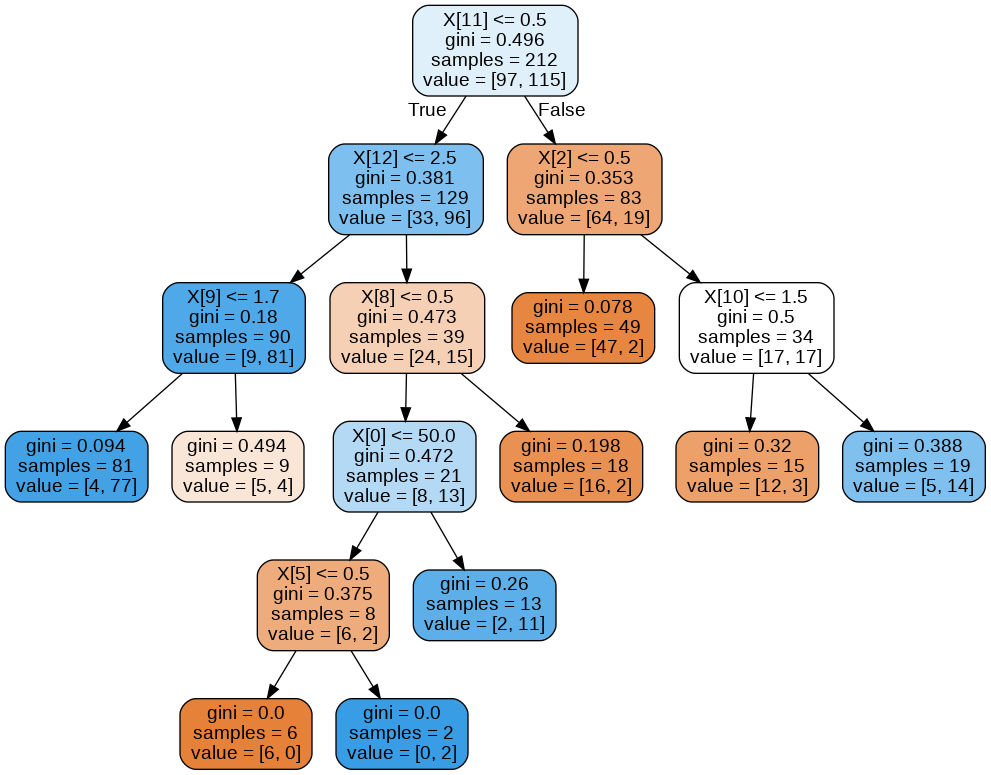

In [83]:
#plot the tree
#your code here
with open("tree3.dot", 'w') as f:
     f = tree.export_graphviz(DT_pruned,out_file=f,rounded = True,filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree3.dot','-o','tree3.png'])

# Annotating chart with PIL
img = Image.open("tree3.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

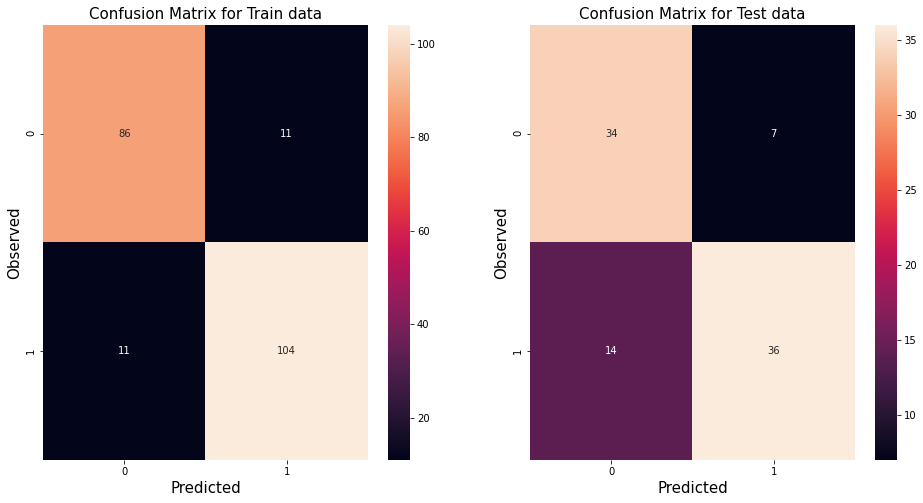

In [85]:
#plot the confusion matrix
#your code here
cvprune_train_con_mat,cvprune_test_con_mat=plot_con_mat(DT_pruned);

In [86]:
#Performance
#your code here
dtprune_train_acc=accuracy(X_train,y_train,DT_pruned)
dtprune_test_acc=accuracy(X_test,y_test,DT_pruned)
print(f'Train accuracy using best cross validated pruned tree with ccp_alpha {ideal_ccp_alpha:.5f} is {dtprune_train_acc:.2f}')
print(f'Test accuracy using best cross validated pruned tree with ccp_alpha {ideal_ccp_alpha:.5f} is {dtprune_test_acc:.2f}')

Train accuracy using best cross validated pruned tree with ccp_alpha 0.01400 is 0.90
Test accuracy using best cross validated pruned tree with ccp_alpha 0.01400 is 0.77


In [207]:
model_params['Pruning using CV on ccp_alphas']=get_model_info(dtprune_train_acc,{'ccp_alpha':ideal_ccp_alpha},dtprune_test_acc,cvprune_train_con_mat,cvprune_test_con_mat)

###### What conclusions can you draw from the confusion matrix above? How different is this from the Basic Decision Tree Model defined by you

your answer here


#### 2.2.1.2 Pruning Single Decision Tree by Depth

We fit here a single tree to our dataset and perform 5-fold cross validation on the training set. For **EACH depth of the tree, we fit a tree** and then compute the 5-fold CV scores. These scores are then averaged and compared across different depths.

1. Write a code to cross validate for different depths( 5 fold cross validation) on the training set. Consider the value of `min_samples_split=10`

2. Plot the cross validation accuracy against each depth. 

3. Based on the graph, chose the `best_depth`

4. Using the value of `best_depth`, fit a new decision tree classifer, and check its training and testing accuracy and plot its confusion matrix

In [88]:
#Find optimal depth of trees
depth, tree_start, tree_end = {'depth':[],'mean_score':[],'std_score':[]},2,15
for i in range(tree_start, tree_end):
    #your code here
    dtree=DecisionTreeClassifier(max_depth=i,min_samples_split=10)
    tree_val_score=cross_val_score(dtree,X_train,y_train,cv=5)
    depth['depth'].append(i)
    depth['mean_score'].append(np.mean(tree_val_score))
    depth['std_score'].append(np.std(tree_val_score))    

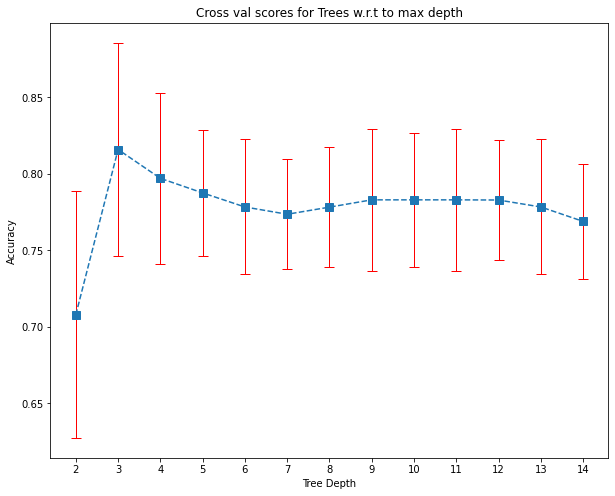

In [89]:
#Plot the variation of cross validation accuracy wrt max_depth
#your code here
fig=plt.figure(figsize=(10,8))
plt.errorbar(depth['depth'],depth['mean_score'],yerr=depth['std_score'],fmt='s--', markersize=8, capsize=5,ecolor='r',elinewidth=1)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depth['depth'])
plt.title('Cross val scores for Trees w.r.t to max depth');

##### What is the optimal depth according to you from the graph above. 



In [90]:
#Make 'best_depth' a variable
#your code here
best_depth=depth['depth'][np.argmax(depth['mean_score'])]

##### Set the max_depth as best_depth obtained in previous part

1. Set the max_depth as best_depth obtained in previous part, and fit the model, set the `random_state = rf`. Call this model **DT_max_depth**
2. Print the performance of the model(training and testing accuracy) using the accuracy function defined by you. 
3. Plot the confusion matrix to evaluate the model. 
4. Based on the confusion matrix and the accuracy 
5. Plot the Decision Tree built using sklearn's tree


In [91]:
#fit the model
#your code here.
DT_best_depth=DecisionTreeClassifier(max_depth=best_depth,min_samples_split=10,random_state=rf)
DT_best_depth.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [92]:
#Performance
#your code here
dt_bestdepth_train_acc=accuracy(X_train,y_train,DT_best_depth)
dt_bestdepth_test_acc=accuracy(X_test,y_test,DT_best_depth)
print(f'Train accuracy using best cross validated depth pruned tree with max depth {best_depth} is {dt_bestdepth_train_acc:.2f}')
print(f'Test accuracy using best cross validated pruned tree with max depth {best_depth} is {dt_bestdepth_test_acc:.2f}')

Train accuracy using best cross validated depth pruned tree with max depth 3 is 0.87
Test accuracy using best cross validated pruned tree with max depth 3 is 0.77


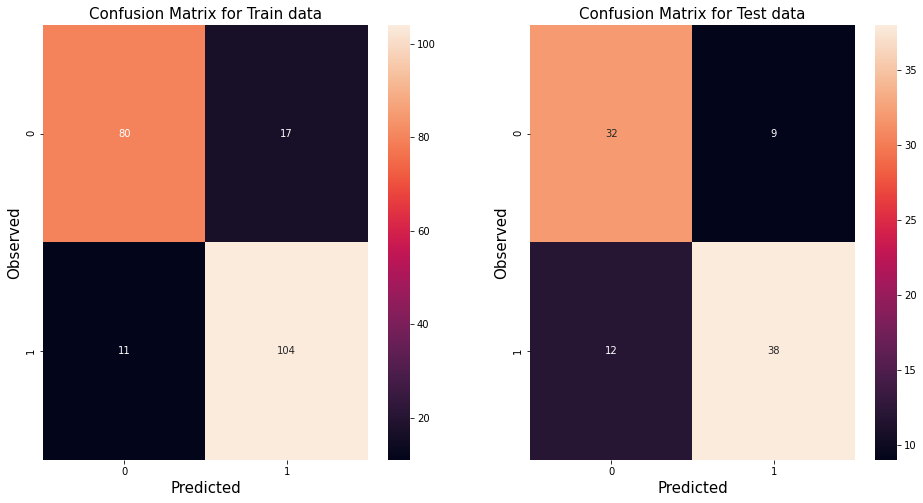

In [93]:
#confusion matrix
#your code here
depth_prune_train_con_mat,depth_prune_test_con_mat=plot_con_mat(DT_best_depth);

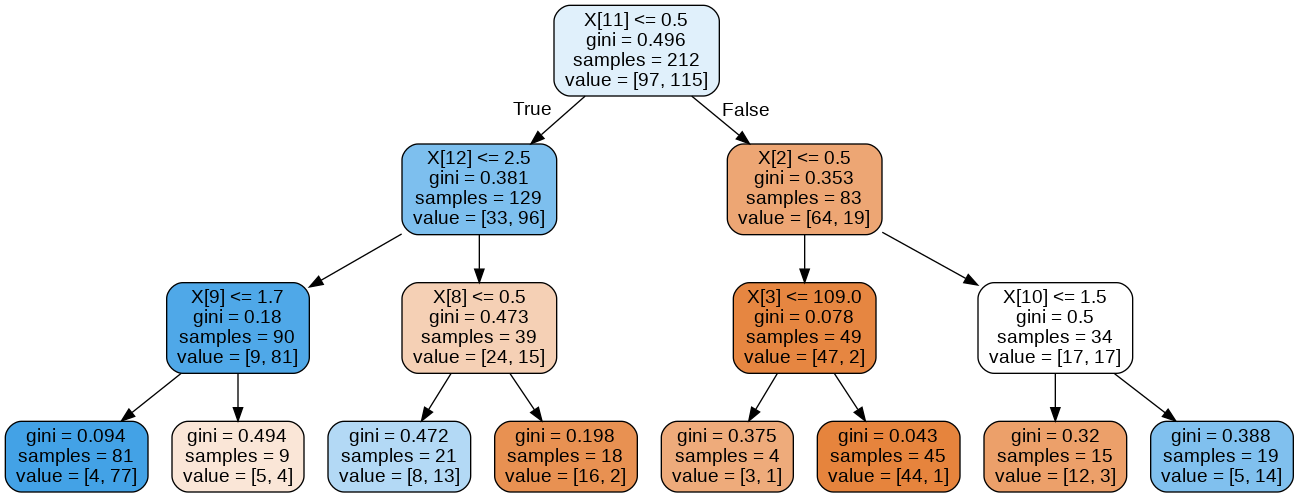

In [94]:
#plot the tree
#your code here
with open("tree4.dot", 'w') as f:
     f = tree.export_graphviz(DT_best_depth,out_file=f,rounded = True,filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree4.dot','-o','tree4.png'])

# Annotating chart with PIL
img = Image.open("tree4.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [208]:
model_params['Depth Pruned Tree']=get_model_info(train_acc=dt_bestdepth_train_acc,
                                                 model_params={'max_depth':best_depth,'min_samples_split':10},
                                                 test_acc=dt_bestdepth_test_acc,
                                                 train_con_mat=depth_prune_train_con_mat,
                                                 test_con_mat=depth_prune_test_con_mat)

#### 2.2.2 Comparing Decision Tree models

Of the three Models built - Decision tree, DT_pruned(with idea_ccp_alpha) and DT_max_depth(with best_depth) which Model performs better and why?

your answer here

### 2.3 Bagging Tree Model **(10 marks)**

Whats the basic idea?

A Single Decision tree is likely to overfit as seen previously.
So lets introduce replication through Bootstrap sampling.
Bagging uses bootstrap resampling to create different training datasets. This way each training will give us a different tree.


1. Provide the `model` as baggingclassifer with `random state = rf`
2. Set the `bagging parameters` - `n_estimators` to be a range from 30 to 150.
3. Pass the `bagging parameters` and `model` to the `GridSearchCV` and set the `cv = 10` and `scoring = 'accuracy'`
4. Fit the model
5. Find the testing and training accuracy
6. Plot the confusion matrix

In [98]:
#Hyper-parameter tuning
#your code here
bag_tree=BaggingClassifier(random_state=rf)
param_grid={'n_estimators':list(range(30,150))}

In [99]:
#Print the best parameters
#your code here
best_bag_estimate,best_bag_params=cv_optimize(bag_tree,param_grid,X_train,y_train,10,verbose=False)

BEST {'n_estimators': 45} 0.7922077922077921


In [100]:
num_est=best_bag_params['n_estimators']

In [101]:
#Performance
#your code here
dt_bag_train_acc=accuracy(X_train,y_train,best_bag_estimate)
dt_bag_test_acc=accuracy(X_test,y_test,best_bag_estimate)
print(f'Train accuracy using Bagging Classifier with estimators {num_est} is {dt_bag_train_acc:.2f}')
print(f'Test accuracy using Bagging Classifier with estimators {num_est} is {dt_bag_test_acc:.2f}')

Train accuracy using Bagging Classifier with estimators 45 is 1.00
Test accuracy using Bagging Classifier with estimators 45 is 0.81


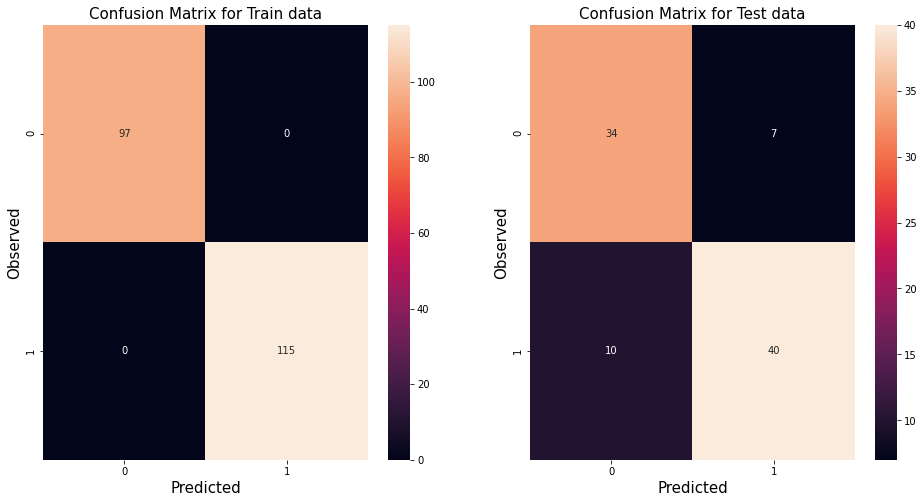

In [103]:
#plot confusion matrix
#your code here
dt_bag_train_con_mat,dt_bag_test_con_mat=plot_con_mat(best_bag_estimate);

In [209]:
model_params['Bagged Tree']=get_model_info(dt_bag_train_acc,best_bag_params,dt_bag_test_acc,dt_bag_train_con_mat,dt_bag_test_con_mat)

Does this perform better than Decision Tree?

your answer here

### 2.4 Random Forest **(15 marks)**

What's the basic idea?

Bagging alone is not enough randomization, because even after bootstrapping, we are mainly training on the same data points using the same variables, and will retain much of the overfitting.

So we will build each tree by splitting on **"random"** subset of predictors at each split (hence, each is a 'random tree'). This can't be done in with just one predictor, but with more predictors we can choose what predictors to split on randomly and how many to do this on. Then we combine many 'random trees' together by averaging their predictions, and this gets us a forest of random trees: a random forest.

Below we create a hyper-param Grid(GridSearchCV). Things to remember:

* `max_features` : int, float, string or None, optional (default=”auto”)
  * The number of features to consider when looking for the best split. 

Steps to follow
1. Provide the `model` as `RandomForestclassifer` with `random state = rf`
2. Set the Rf parameters - `n_estimators`, `max_depth`, `max_features` and `min_samples_split`. - Chose the range to be what you think is suitable.
3. Pass the Rf parameters and model to the GridSearchCV and set the `cv = 10` and `scoring = 'accuracy'`. Call this model RF_model
4. Fit the model
5. Find the testing and training accuracy
6. Plot the confusion matrix

In [149]:
#define the model, param_grid and fit the model
#your code here
rf_model=RandomForestClassifier(warm_start=True,random_state=rf,n_jobs=-1)
param_grid={'n_estimators':[350,400,450,500,600],'max_depth':[2,4,6,8],'max_features':list(range(2,8)),'min_samples_split':[2]}

In [150]:
#Print the best parameters
#your code here
rf_estimate,rf_params=cv_optimize(rf_model,param_grid,X_train,y_train,10,verbose=3)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 14.0min finished


BEST {'max_depth': 2, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 500} 0.8393939393939392


In [151]:
#Performance
#your code here
dt_rf_train_acc=accuracy(X_train,y_train,rf_estimate)
dt_rf_test_acc=accuracy(X_test,y_test,rf_estimate)
print(f'Train accuracy using Random Forest Classifier with best estimators is {dt_rf_train_acc:.2f}')
print(f'Test accuracy using Random Forest Classifier with best estimators is {dt_rf_test_acc:.2f}')

Train accuracy using Random Forest Classifier with best estimators is 0.88
Test accuracy using Random Forest Classifier with best estimators is 0.88


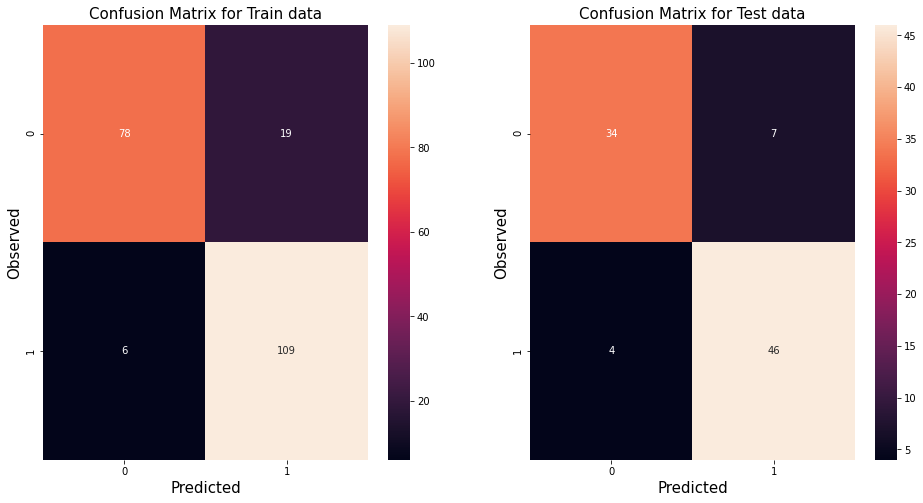

In [168]:
#plot the confusion matrix
#your code here
dt_rf_train_con_mat,dt_rf_test_con_mat=plot_con_mat(rf_estimate);

In [210]:
model_params['Random Forest']=get_model_info(dt_rf_train_acc,rf_params,dt_rf_test_acc,dt_rf_train_con_mat,dt_rf_test_con_mat)

#### 2.4.1 Permutance Importance 

Comparison between Bagging model and Random Forest Model

1. Define a function to plot the permutance importance.
2. Next call the sklearn function permutance importance and pass the Random Forest and Bagging model to it.
3. Using the plotting function defined in step 1, compare the permutance importance plots for both the models

In [154]:
def p_importance(model,X,y):
    result=permutation_importance(model,X,y,n_jobs=-1,random_state=rf)
    cols=X.columns
    fi=result.importances_mean
    fistd=result.importances_std
    return pd.DataFrame({'features':cols, 'importance':fi, 'importance_std': fistd}
                       ).sort_values('importance', ascending=False)

In [155]:
# find permutation importance for Bagging and Random Forest models
#your code here
df_rf=p_importance(rf_estimate,X_test,y_test)
df_bag=p_importance(best_bag_estimate,X_test,y_test)

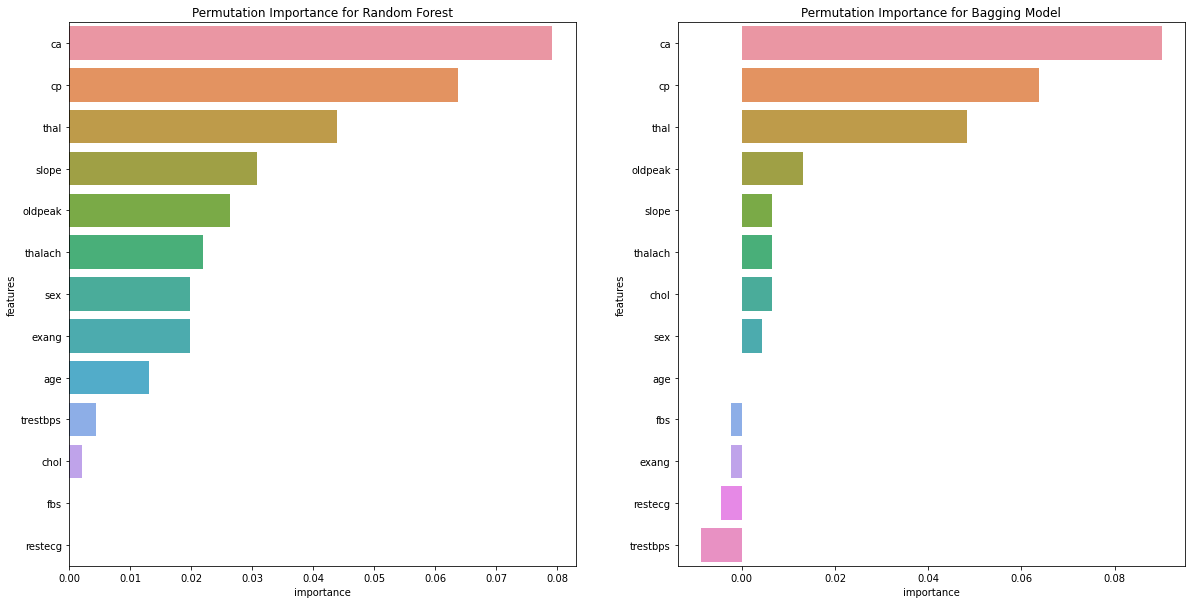

In [156]:
#plot the permutance importance using the function define above
#your code here
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=df_rf['importance'],y=df_rf['features'],orient='h',ax=ax[0])
sns.barplot(x=df_bag['importance'],y=df_bag['features'],orient='h',ax=ax[1])
ax[0].set_title('Permutation Importance for Random Forest')
ax[1].set_title('Permutation Importance for Bagging Model');

#### 2.4.2 Out of Bag Score

Out of bag (OOB) score is a way of validating the Random forest model.

We'll now engage in our very own version of a grid-search, done over the out-of-bag scores that sklearn gives us for free. 

1. Set the values for `n_estimators` and `max_features`,` max_depth` and `min_samples_split` in a `param_dict`
2. Create two lists - results and estimators
  * `results` will store the `oob_score` for each tree you fit
  * `estimators` will score the parameters for each tree
3. Run your model through values of the `param_dict`
4. Get the best value of oob_score from results, and assign that to `outparams` variable
5. Get the best estimator from the `outparams` for the best `oob_score`
6. Check the accuracy of the model(best_estimator)
7. Plot the confusion matrix


In [157]:
from itertools import product
from collections import OrderedDict
#setting the depth and min_samples_split and max_features
#your code here
param_dict = OrderedDict(n_estimators = [100,150,200,250,300,400],max_features = [0.2,0.4,0.6,0.8],min_samples_split = list(range(2,15)))
param_dict.values()

odict_values([[100, 150, 200, 250, 300, 400], [0.2, 0.4, 0.6, 0.8], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]])

In [159]:
print('Total number of parameter combinations to checked:',len(list(product(*param_dict.values()))))

Total number of parameter combinations to checked: 312


In [160]:
results = {}
estimators= {}
#your code here
for nest, maxf, min_sam in tqdm(product(*param_dict.values())):
    params = (nest, maxf, min_sam)
    est = RandomForestClassifier(oob_score=True, n_estimators=nest, max_features=maxf, min_samples_split=min_sam, random_state=rf, n_jobs=-1)
    est.fit(X_train, y_train)
    results[params] = est.oob_score_
    estimators[params] = est
outparams = max(results, key = results.get)
print('BEST PARAMS:',outparams)


BEST PARAMS: (250, 0.2, 3)


In [161]:
#Call the best estimator from the previous loop of estimators for outparams as Random_Oob
#your code here
Random_Oob = estimators[outparams]

In [162]:
#Performance
#your code here
random_oob_train_acc=accuracy(X_train,y_train,Random_Oob)
random_oob_test_acc=accuracy(X_test,y_test,Random_Oob)
print(f'Train accuracy using Random Forest Classifier with best estimators is {random_oob_train_acc:.2f}')
print(f'Test accuracy using Random Forest Classifier with best estimators is {random_oob_test_acc:.2f}')

Train accuracy using Random Forest Classifier with best estimators is 1.00
Test accuracy using Random Forest Classifier with best estimators is 0.86


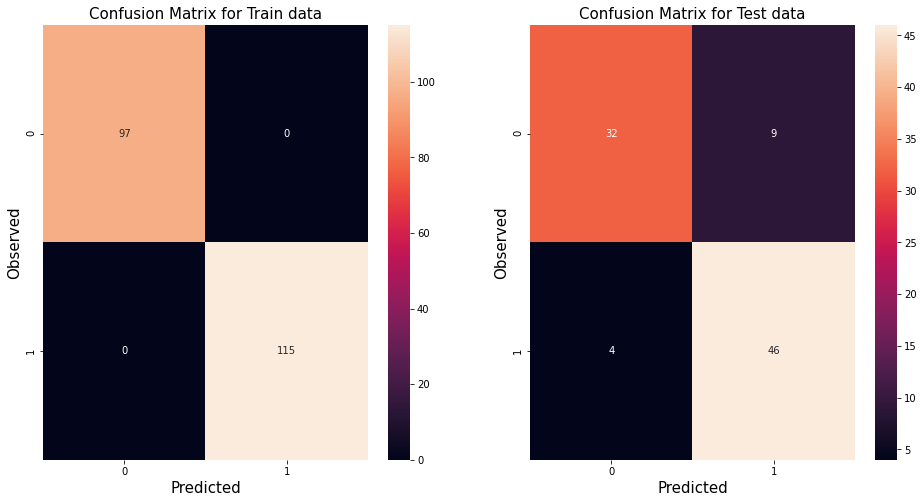

In [164]:
#Plot the confusion matrix 
#your code here
oob_train_con_mat,oob_test_con_mat=plot_con_mat(Random_Oob);

In [211]:
model_params['OOB validated Random Forest']=get_model_info(train_acc=random_oob_train_acc,
                                                           model_params={'n_estimators':250,'max_features':0.2,'min_samples_split':3},
                                                           test_acc=random_oob_test_acc,
                                                           train_con_mat=oob_train_con_mat,
                                                           test_con_mat=oob_test_con_mat)

##### Comparing OOB_score with Random Forest cross validation 

In the beginning of section 2.4 you found the best parameters to set for your RandomForest Classifer in the **RF_model**.

In this step, build a model call it RF_compare, and set the parameters same as the best params you got from **RF_model** and also set the **oob_score as true**. 
Compare the results you get from this model against the base model you had for Randomforest

In [170]:
#define the model, set the best parameters and oob_score = true
#your code here
RF_compare=rf_estimate.set_params(oob_score=True)
RF_compare.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=True)

In [171]:
#Performance
#your code here
rf_com_oob_train_acc=accuracy(X_train,y_train,RF_compare)
rf_com_oob_test_acc=accuracy(X_test,y_test,RF_compare)
print(f'Train accuracy using Random Forest Classifier with best estimators is {rf_com_oob_train_acc:.2f}')
print(f'Test accuracy using Random Forest Classifier with best estimators is {rf_com_oob_test_acc:.2f}')

Train accuracy using Random Forest Classifier with best estimators is 0.88
Test accuracy using Random Forest Classifier with best estimators is 0.88


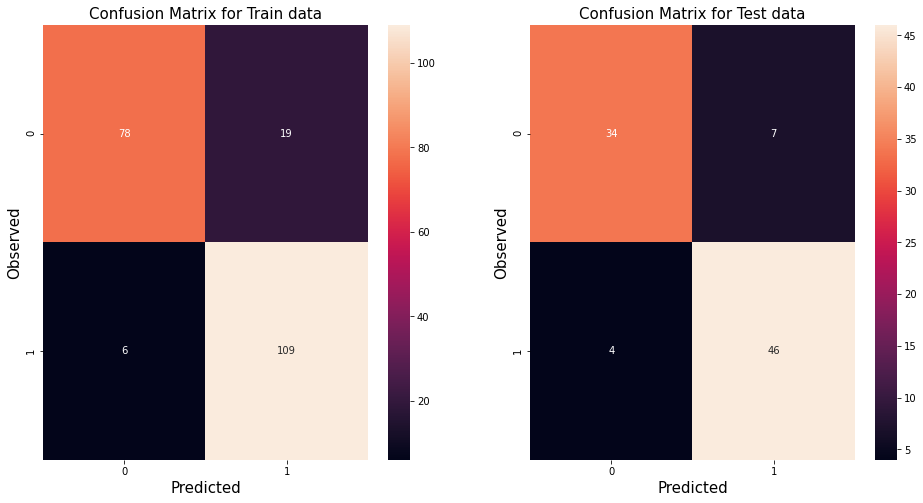

In [172]:
#plot the confusion matrix
#your code here
cv_rf_train_con_mat,cv_rf_test_con_mat=plot_con_mat(RF_compare)

###### Does your **RF_compare** model perform better or worse than the cross validated model - **RF_model**? Do you think its necessary to cross validate for a random forest?

your answer here

### 2.5 Boosting Tree **(10 marks)**

Adaboost Classification, is a special case of a gradient-boosted algorithm. Gradient Boosting is very state of the art, and has major connections to logistic regression, gradient descent in a functional space, and search in information space.

The idea is that we will use a bunch of weak 'learners' (aka, models) which are fit sequentially. The first one fits the signal, the second one the first model's residual, the third the second model's residual, and so on. At each stage we upweight the places that our previous model did badly on. 

Things to remember:
* `n_estimators` is the number of trees, and thus the stage in the fitting. It also controls the complexity for us. The more trees we have the more we fit to the tiny details.
*`learning_rate` Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

Steps to follow
1. Provide the model as AdaBoostclassifer with `random state = rf`
2. Set the boosting parameters - boost__n_estimators to be a range from 10 to 120. and `"boost__learning_rate":[0.001,0.01,0.1,0.2, 0.5,1,1.2,1.5]`
3. Pass the bagging parameters and pipeline to GridSearchCV and set the `cv = 10` and `scoring = 'accuracy'`
4. Fit the model
5. Find the best hyperparameters, testing and training accuracy
6. Plot the confusion matrix


In [174]:
#Build an adaboost pipe
#your code here
ada_model=AdaBoostClassifier(random_state=rf)
boost_param={'n_estimators':list(range(10,121)),'learning_rate':[0.001,0.01,0.1,0.2, 0.5,1,1.2,1.5]}
best_boost_estimate,best_boost_params=cv_optimize(ada_model,boost_param,X_train,y_train,10,verbose=3)

Fitting 10 folds for each of 888 candidates, totalling 8880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 894 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2010 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2744 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3488 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4524 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 5834 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 7370 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 8724 tasks      | elapsed: 13.5min


BEST {'learning_rate': 0.1, 'n_estimators': 19} 0.8534632034632035


[Parallel(n_jobs=-1)]: Done 8880 out of 8880 | elapsed: 13.9min finished


In [175]:
#Print the best hyperparameters
#your code here
print('The best params for the AdaBoost model is:')
print(best_boost_params)

The best params for the AdaBoost model is:
{'learning_rate': 0.1, 'n_estimators': 19}


In [176]:
#Performance
#your code here
boost_train_acc=accuracy(X_train,y_train,best_boost_estimate)
boost_test_acc=accuracy(X_test,y_test,best_boost_estimate)
print(f'Train accuracy using Random Forest Classifier with best estimators is {boost_train_acc:.2f}')
print(f'Test accuracy using Random Forest Classifier with best estimators is {boost_test_acc:.2f}')

Train accuracy using Random Forest Classifier with best estimators is 0.87
Test accuracy using Random Forest Classifier with best estimators is 0.82


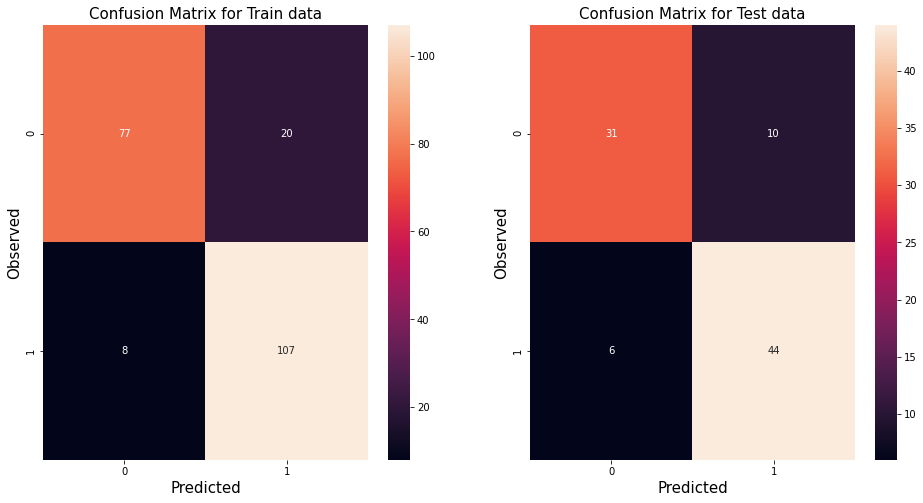

In [188]:
#plot the confusion matrix
#your code here
boost_train_con_mat,boost_test_con_mat=plot_con_mat(best_boost_estimate);

In [212]:
model_params['AdaBoost']=get_model_info(boost_train_acc,best_boost_params,boost_test_acc,boost_train_con_mat,boost_test_con_mat)

### 2.6 XGboost **(10 marks)**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. To read more about XGBoost, click [here](https://xgboost.readthedocs.io/en/latest/)

Steps to follow

1. Set the classifer as XGBClassifer 
2. Set the xgb_parameters - n_estimators to be a range from [10,20,30,40,50,60,70,80,90,100,120,130,140,150]. and `'learning_rate': [0.001, 0.01, .1,.4, .45, .5, .55, .6]`
3. Pass the xgb_parameters to RandomizedSearchCV and set the cv = 10 and `scoring = 'accuracy'` and `n_iter = 100`
4. Fit the model
5. Find the best hyperparameters, testing and training accuracy
6. Plot the confusion matrix

In [10]:
import xgboost as xgb

In [178]:
#assign the XGB_Classifer
#your code here
xgb_model=xgb.XGBClassifier(random_state=rf)

In [179]:
#set parameters
#your code here
xgb_parameters={'n_estimators':list(range(10,160,10)),'learning_rate':[0.001, 0.01, .1,.4, .45, .5, .55, .6]}

In [183]:
#pass the parameters to the model and fit the model
#your code here
rs=RandomizedSearchCV(xgb_model,xgb_parameters,scoring='accuracy',n_iter=100,random_state=rf,n_jobs=-1)
rs.fit(X_train,y_train)
print("BEST", rs.best_params_, rs.best_score_)
best_xgb_model=rs.best_estimator_

BEST {'n_estimators': 50, 'learning_rate': 0.01} 0.8396456256921372


In [184]:
#get the best parameter values
#your code here
print('The best parameters for the XGB Classifier model is:')
print(rs.best_params_)

The best parameters for the XGB Classifier model is:
{'n_estimators': 50, 'learning_rate': 0.01}


In [185]:
#Performance
#your code here
xgb_train_acc=accuracy(X_train,y_train,best_xgb_model)
xgb_test_acc=accuracy(X_test,y_test,best_xgb_model)
print(f'Train accuracy using XGB Classifier with best estimators is {xgb_train_acc:.2f}')
print(f'Test accuracy using XBG Classifier with best estimators is {xgb_test_acc:.2f}')

Train accuracy using XGB Classifier with best estimators is 0.89
Test accuracy using XBG Classifier with best estimators is 0.80


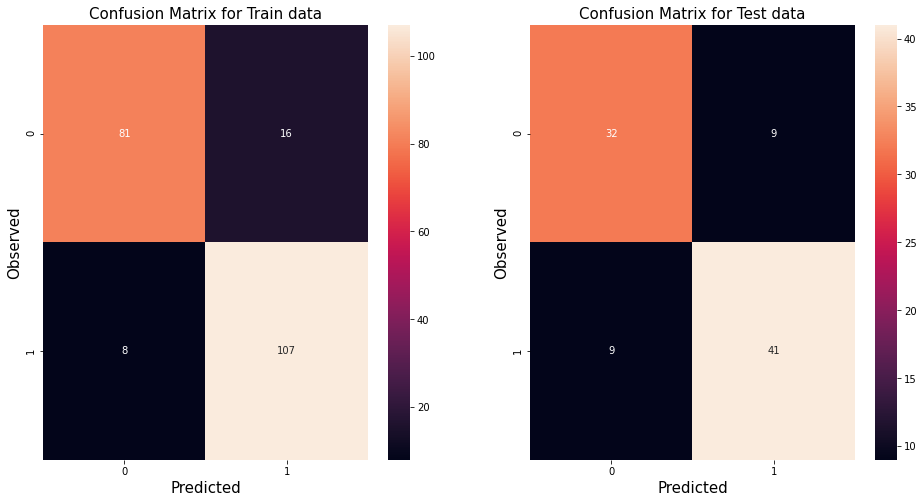

In [191]:
#plot the confusion matrix 
#your code here
xgb_train_con_mat,xgb_test_con_mat=plot_con_mat(best_xgb_model)

In [213]:
model_params['XGBoost']=get_model_info(xgb_train_acc,rs.best_params_,xgb_test_acc,xgb_train_con_mat,xgb_test_con_mat)

## Part 3: Comparing all models **(10 marks)**

Now that we have built all these models lets compare them:

1. Plot all the testing accuracies for all the models - Logistic Regression Model, Decision Tree baseline, Decision tree with ideal_alpha, Decision tree with best depth, Bagging model, Random Forest model, Random Forest with oob_score = true, Boosting Model, XGBoost model

2. Plot the overfitting accuracies for all the models - train accuracy - test accuracy

3. Plot the confusion matrix for the all the models

4. Based on these plots draw a conclusion for which is the best and worst performing model.

In [217]:
#Comparing performance of all models - testing accuracy
#your code here
compare_df=pd.DataFrame.from_records(model_params).T
compare_df

,Model Params,Train Accuracy,Test Accuracy,"Train [TP,FP,TN,FN]","Test [TP,FP,TN,FN]",Train Precision,Train Recall,Train F1,Test Precision,Test Recall,Test F1
AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 19}",0.867925,0.824176,"[107, 20, 77, 8]","[44, 10, 31, 6]",0.84252,0.930435,0.884298,0.814815,0.88,0.846154
Bagged Tree,{'n_estimators': 45},1,0.813187,"[115, 0, 97, 0]","[40, 7, 34, 10]",1,1,1,0.851064,0.8,0.824742
Decision Tree,{'depth': 9},1,0.736264,"[115, 0, 97, 0]","[35, 9, 32, 15]",1,1,1,0.795455,0.7,0.744681
Depth Pruned Tree,"{'max_depth': 3, 'min_samples_split': 10}",0.867925,0.769231,"[104, 17, 80, 11]","[38, 9, 32, 12]",0.859504,0.904348,0.881356,0.808511,0.76,0.783505
Logistic_Regression,"{'classifier__C': 1, 'classifier__penalty': 'l1'}",0.863208,0.813187,"[104, 18, 79, 11]","[42, 9, 32, 8]",0.852459,0.904348,0.877637,0.823529,0.84,0.831683
OOB validated Random Forest,"{'n_estimators': 250, 'max_features': 0.2, 'mi...",1,0.857143,"[115, 0, 97, 0]","[46, 9, 32, 4]",1,1,1,0.836364,0.92,0.87619
Pruning using CV on ccp_alphas,{'ccp_alpha': 0.013999999999999999},0.896226,0.769231,"[104, 11, 86, 11]","[36, 7, 34, 14]",0.904348,0.904348,0.904348,0.837209,0.72,0.774194
Pruning using ccp,{'ccp_alpha': 0.019578383414861414},0.863208,0.802198,"[108, 22, 75, 7]","[42, 10, 31, 8]",0.830769,0.93913,0.881633,0.807692,0.84,0.823529
Random Forest,"{'max_depth': 2, 'max_features': 3, 'min_sampl...",0.882075,0.879121,"[109, 19, 78, 6]","[46, 7, 34, 4]",0.851562,0.947826,0.897119,0.867925,0.92,0.893204
XGBoost,"{'n_estimators': 50, 'learning_rate': 0.01}",0.886792,0.802198,"[107, 16, 81, 8]","[41, 9, 32, 9]",0.869919,0.930435,0.89916,0.82,0.82,0.82


#### **Which is the best and worse model?**

your answer here

## Bonus Question **(20 marks)**
The dataset provided to you is already preprocessed - all variables are already one-hot encoded. 

Sklearn requires all its categorical variables to be one-hot encoded. But tree based methods work best with **ordinal encoding**. 
Get the original data from [here](http://archive.ics.uci.edu/ml/datasets/heart+disease), and ordinal encode the variables. Run one of the tree models to check how ordinal encoding is better. 